In [41]:
library('caret')

In [42]:
set.seed(37)

getData <- function(N=1000) {
    x1 <- rnorm(N, mean=0, sd=1)
    x2 <- rnorm(N, mean=0, sd=1)
    y <- 1 + 2.0 * x1 + 3.0 * x2 + rnorm(N, mean=0, sd=1)
    y <- 1.0 / (1.0 + exp(-y))
    y <- rbinom(n=N, size=1, prob=y)

    df <- data.frame(x1=x1, x2=x2, y=y)
    return(df)
}

D <- getData()

In [44]:
suppressMessages({
    library('missForest')
})

D.M <- prodNA(D, noNA=0.1)

In [45]:
trIndices <- createDataPartition(D$y, times=1, p=0.8, list=FALSE)

In [58]:
D.T <- D.M[trIndices, ]
D.V <- D.M[-trIndices, ]

In [59]:
dim(D.T)

[1] 800   3

In [60]:
dim(D.V)

[1] 200   3

In [61]:
library('skimr')

In [62]:
skimmed <- skim(D.T)

In [63]:
skimmed

── Data Summary ────────────────────────
                           Values
Name                       D.T   
Number of rows             800   
Number of columns          3     
_______________________          
Column type frequency:           
  numeric                  3     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean    sd    p0    p25     p50   p75
1 x1                   82         0.898 -0.0362 1.03  -2.86 -0.739 -0.0528 0.656
2 x2                   79         0.901  0.0312 1.02  -3.29 -0.602  0.0594 0.718
3 y                    75         0.906  0.597  0.491  0     0      1      1    
   p100 hist 
1  3.81 ▂▇▇▂▁
2  3.18 ▁▃▇▅▁
3  1    ▆▁▁▁▇


In [64]:
skimmed <- skim(D.V)

In [65]:
skimmed

── Data Summary ────────────────────────
                           Values
Name                       D.V   
Number of rows             200   
Number of columns          3     
_______________________          
Column type frequency:           
  numeric                  3     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean    sd    p0    p25    p50   p75
1 x1                   22          0.89  0.124  0.959 -2.81 -0.438 0.127  0.800
2 x2                   24          0.88 -0.0322 1.05  -3.06 -0.720 0.0395 0.661
3 y                    18          0.91  0.615  0.488  0     0     1      1    
   p100 hist 
1  2.61 ▁▃▇▆▁
2  3.15 ▁▃▇▃▁
3  1    ▅▁▁▁▇


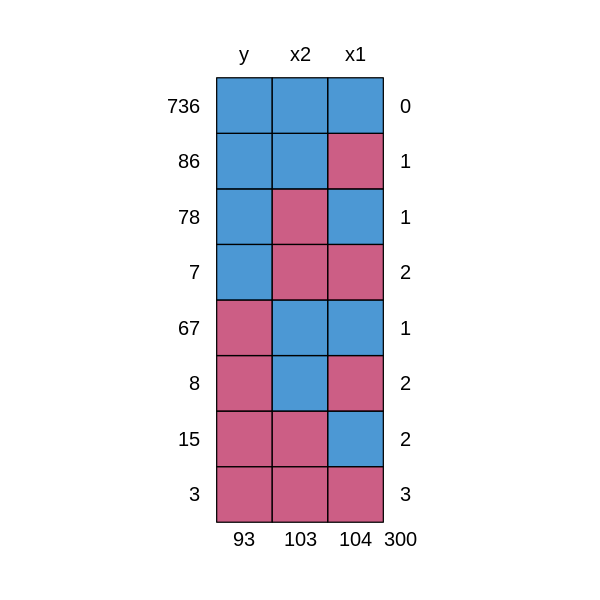

In [66]:
suppressMessages({
    library('mice')
})

options(repr.plot.width=5, repr.plot.height=5)

p <- md.pattern(D.M)

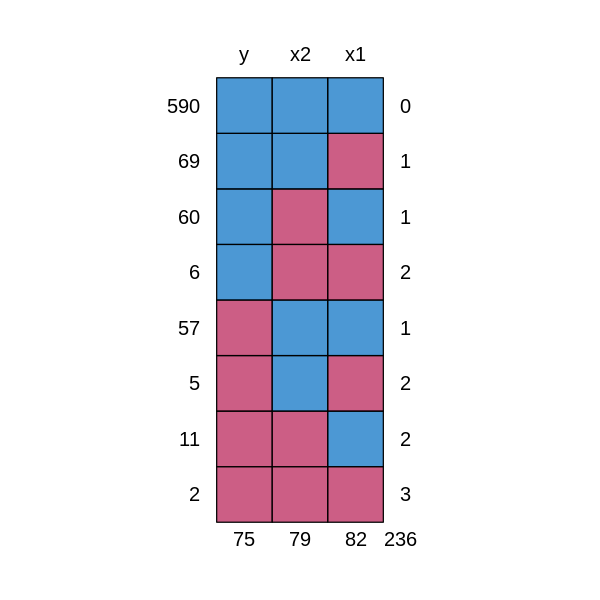

In [67]:
p <- md.pattern(D.T)

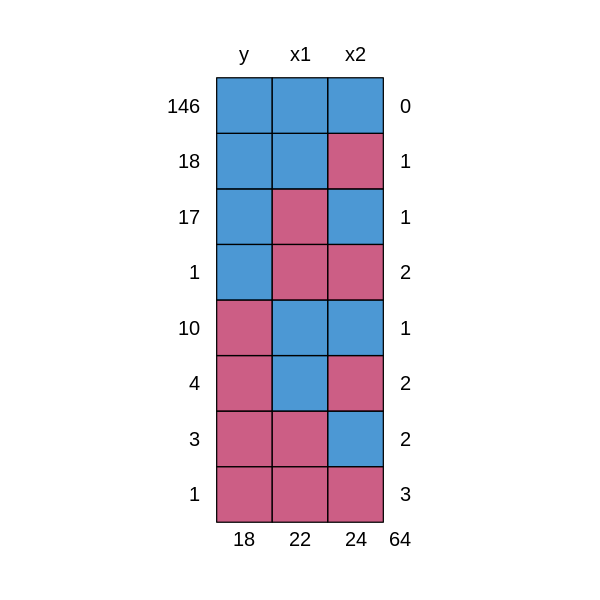

In [68]:
p <- md.pattern(D.V)

In [69]:
ppmdT <- preProcess(D.T, method='knnImpute')

In [71]:
ppmdT

Created from 590 samples and 3 variables

Pre-processing:
  - centered (3)
  - ignored (0)
  - 5 nearest neighbor imputation (3)
  - scaled (3)


In [73]:
library('RANN')

T.D <- predict(ppmdT, newdata=D.T)

anyNA(T.D)

ERROR: Error in FUN(newX[, i], ...): cannot impute when all predictors are missing in the new data point
